# 探索数据集-泰坦尼克

# 1.问题调查

## 1.1.有哪些因素会让船上的人生还率更高？

1.年龄与生还率的关系

2.性别与生还率的关系

3.票价与生还率的关系

## 2.数据加工

## 2.1.数据采集

### 2.1.1.数据字段含义

Variable | Definition | Key
---------| -----------|------
PassengerId | Passenger id(旅客编号) |
survival | Survival(旅客) | 0 = No, 1 = Yes
pclass | Ticket class(船票类型) | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex(性别) |	
Age | Age(年龄) | in years	
sibsp | of siblings / spouses aboard the Titanic(一同上船的兄弟姐妹或配偶) |	
parch | of parents / children aboard the Titanic(一同上船的父母或孩子) |	
ticket | Ticket number(票号) |	
fare | Passenger fare(票价) |	
cabin | Cabin number(船舱) |	
embarked | Port of Embarkation(出发港) | C = Cherbourg, Q = Queenstown, S = Southampton
 


### 2.1.2.变量使用注意事项
**pclass(船票类型): **

A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age(年龄):  **

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp(一同上船的兄弟姐妹或配偶): **

The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch(一同上船的父母或孩子): **

The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 2.1.3.通用函数

In [4]:
'''
汇总常用的数据处理函数
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

'''
加载数据文件
必须是 csv 文件
'''
def load_data_csv (filename):
    titanic_df = pd.read_csv(filename)
    return titanic_df


'''
修正数据类型
'''
#日期类型修正
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y,-%m-%d')

#整形修正
def parse_maybe_int(num):
    if num == '':
        return None
    else:
        return int(i)
    
    
'''
皮尔逊相关系数
correlation = average of (x in standard units) times(y in standard units)
std(ddof=0)
pearson`s r(-1, 1)
'''
def correlation(x, y):
    x_std = (x - x.mean())/x.std(ddof=0)
    y_std = (y - y.mean())/y.std(ddof=0)
    return (x_std * y_std).mean()


### 2.1.4.导入数据

In [111]:
titanic_df = load_data_csv('titanic-data.csv')



RangeIndex(start=0, stop=891, step=1)
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
#前5行
# print titanic_df.head()
titanic_df.head()
#末尾5行
titanic_df.tail()
#索引
titanic_df.index
#列
print titanic_df.columns
#底层数据
titanic_df.values
#统计汇总
titanic_df.describe()
#数据转置
# titanic_df.T

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [157]:
#按轴进行排序
titanic_df.sort_index(axis=0, ascending=False)
#按值进排序
sv = titanic_df.sort_values(by='Age', axis=0, ascending=True)
sv = titanic_df.sort_values(by=['Age','Fare'], axis=0, ascending=[True,True],na_position='last')
sv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [152]:
#第一行
# titanic_df.iloc[0]
# titanic_df.loc[0]
#指定列
# titanic_df.loc[:, 'Age']
# titanic_df.loc[:, 'Age': "Fare"]
# titanic_df.iloc[:, 0:2]

In [156]:
#去掉缺失值
titanic_dfnew = titanic_df.dropna(axis=0)
titanic_dfnew.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## 2.2.数据清理

### 2.2.1.异常数据项

**1.Age：**年龄信息有小数和空值需要排除
*需要对小数，进行修数，排除异常空值数据*

**2.Fare：**票价有0的情况
*需要排除异常数据*

**3.Cabin：**船舱号有空的情况
*不做参考因素，不处理*

**4.Embarked：**出发港有空的情况
*不做参考因素，不处理*

**5.Pclass：**船票类型与票价的对应中有高类型对应低票价情况，
*需要排除特别数据*

### 2.2.2.修正数据类型

**1.Age：**需要修数，将小数修改为1

**2.Fare：**票价0的数据排除

In [161]:
#去掉 Age 缺失值
Age = titanic_dfnew['Age'].dropna(axis=0, how=any)
# print Age.sort_values()

#将 Age 小数四舍五入为1
def check_age(num):
    if (num < 1):
        num = 1
    return num

Age = Age.apply(check_age)
# print Age.sort_values()


## 3.数据探索

### 3.1.探索年龄与生还率的关系

#### 3.1.1.探索

In [106]:
#生还数据
Survived = titanic_df['Survived'].dropna(axis=0, how=any)
# print Survived
#年龄数据
Age = titanic_df['Age'].dropna(axis=0, how=any)
# print Age

#年龄和生还率的相关性
r = correlation(Survived, Age)
print r

-0.0779826784139


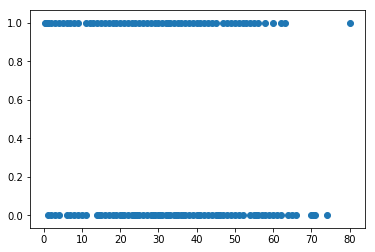

In [107]:
#年龄和生还率的散列图
data_by_age = titanic_df.groupby(['Age','Survived'], as_index=False).mean()
#print data_by_age.head()['Age']
plt.scatter(data_by_age['Age'], data_by_age['Survived'])


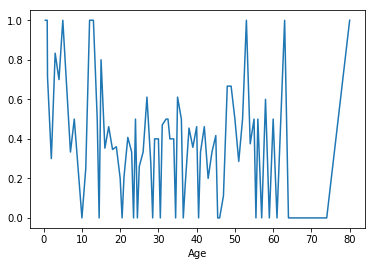

In [54]:
#曲线图
survived_by_age = titanic_df.groupby('Age').mean()['Survived']
# print survived_by_age
survived_by_age.plot()


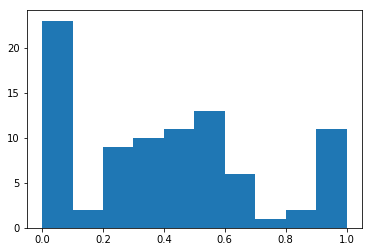

In [55]:
#直方图
plt.hist(survived_by_age)
plt.show()

#### 3.1.2.分析

根据皮尔逊相关系数 r = -0.0779826784139 接近0

#### 3.1.3.结论

年龄与生还率的相关度较低


### 3.2.性别与生还率的关系

#### 3.2.1.探索

Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64


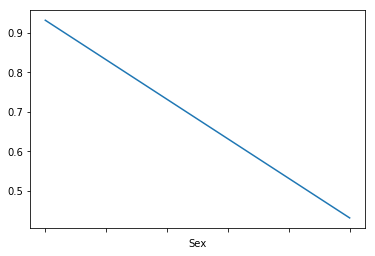

In [163]:
#根据性别分组
survived_by_sex = titanic_df.groupby('Sex').mean()['Survived']
print survived_by_sex
survived_by_sex.plot()


#### 3.2.2.分析

根据根据女性的生还率:93.1818% 大于男性生还率:43.1579%

#### 3.2.3.结论

女性生还率比男性高


### 3.3.票价与生还率的关系

#### 3.2.1.探索

In [165]:
#生还数据
Survived = titanic_df['Survived'].dropna(axis=0, how=any)
# print Survived
#票价数据
Fare = titanic_df['Fare'].dropna(axis=0, how=any)
# print Fare

#票价和生还率的相关性
r = correlation(Survived, Fare)
print r

0.134241052835


#### 3.2.2.分析

根据皮尔逊相关系数 r = 0.134241052835 接近0

#### 3.2.3.结论

票价与生还率的相关度较低，高票价不意味着生还率


## 4.总结和预测

### 4.1.总结

1.性别会影响生还率，女性的生还率要高

2.票价和年龄和生还率的关系不大

遇到危难的时候，让女性首先获取生还的可能，这个可能是造成女性生还率高的原因。

### 4.2.预测


## 5.研究结果交流